In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Cleaned_Online_Retail.csv")

In [3]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392709 entries, 0 to 392708
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   InvoiceNo    392709 non-null  int64 
 1   StockCode    392709 non-null  object
 2   Description  392709 non-null  object
 3   Quantity     392709 non-null  int64 
 4   InvoiceDate  392709 non-null  object
 5   CustomerID   392709 non-null  int64 
 6   Country      392709 non-null  object
 7   Is_Canceled  392709 non-null  bool  
 8   Month        392709 non-null  int64 
 9   Year         392709 non-null  int64 
dtypes: bool(1), int64(5), object(4)
memory usage: 27.3+ MB


(None,
    InvoiceNo StockCode                          Description  Quantity  \
 0     536365    85123A   white hanging heart t-light holder         6   
 1     536365     71053                  white metal lantern         6   
 2     536365    84406B       cream cupid hearts coat hanger         8   
 3     536365    84029G  knitted union flag hot water bottle         6   
 4     536365    84029E       red woolly hottie white heart.         6   
 
   InvoiceDate  CustomerID         Country  Is_Canceled  Month  Year  
 0  2010-01-12       17850  United Kingdom        False      1  2010  
 1  2010-01-12       17850  United Kingdom        False      1  2010  
 2  2010-01-12       17850  United Kingdom        False      1  2010  
 3  2010-01-12       17850  United Kingdom        False      1  2010  
 4  2010-01-12       17850  United Kingdom        False      1  2010  )

In [4]:
# Convert InvoiceDate to datetime format
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Check for duplicate entries
duplicates = df.duplicated().sum()

# Display the number of duplicate entries
duplicates


0

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
duplicates

0

In [7]:
summary_stats = df.describe()

unique_countries = df["Country"].nunique()
unique_products = df["StockCode"].nunique()

summary_stats, unique_countries, unique_products

(           InvoiceNo       Quantity                    InvoiceDate  \
 count  392709.000000  392709.000000                         392709   
 mean   560591.238935      13.154028  2011-06-20 19:24:35.471150336   
 min    536365.000000       1.000000            2010-01-12 00:00:00   
 25%    549234.000000       2.000000            2011-03-30 00:00:00   
 50%    561874.000000       6.000000            2011-07-09 00:00:00   
 75%    572061.000000      12.000000            2011-10-10 00:00:00   
 max    581587.000000   80995.000000            2011-12-10 00:00:00   
 std     13087.035209     181.593596                            NaN   
 
           CustomerID          Month           Year  
 count  392709.000000  392709.000000  392709.000000  
 mean    15287.802032       6.942128    2010.934639  
 min     12346.000000       1.000000    2010.000000  
 25%     13955.000000       4.000000    2011.000000  
 50%     15150.000000       7.000000    2011.000000  
 75%     16791.000000      10.00000

### Monthly Sales

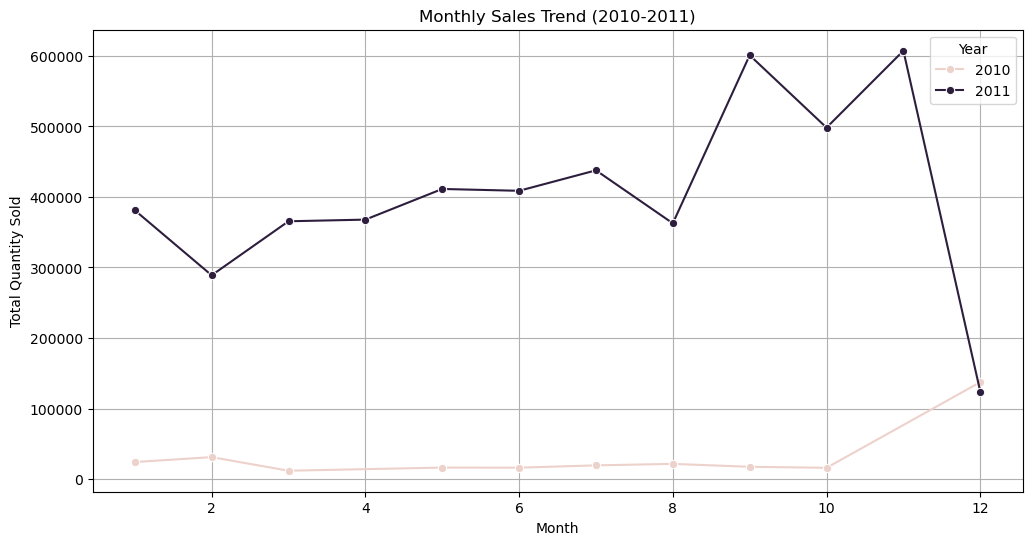

In [9]:
#Sales trend by month
monthly_sales = df.groupby(["Year", "Month", ])["Quantity"].sum().reset_index()

#Plot sales trends over time 
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x="Month", y="Quantity",hue="Year", marker="o")
plt.title("Monthly Sales Trend (2010-2011)")
plt.xlabel("Month")
plt.ylabel("Total Quantity Sold")
plt.legend(title="Year")
plt.grid(True)
plt.show()

### Top 10 Best Salling Products by quantity sold

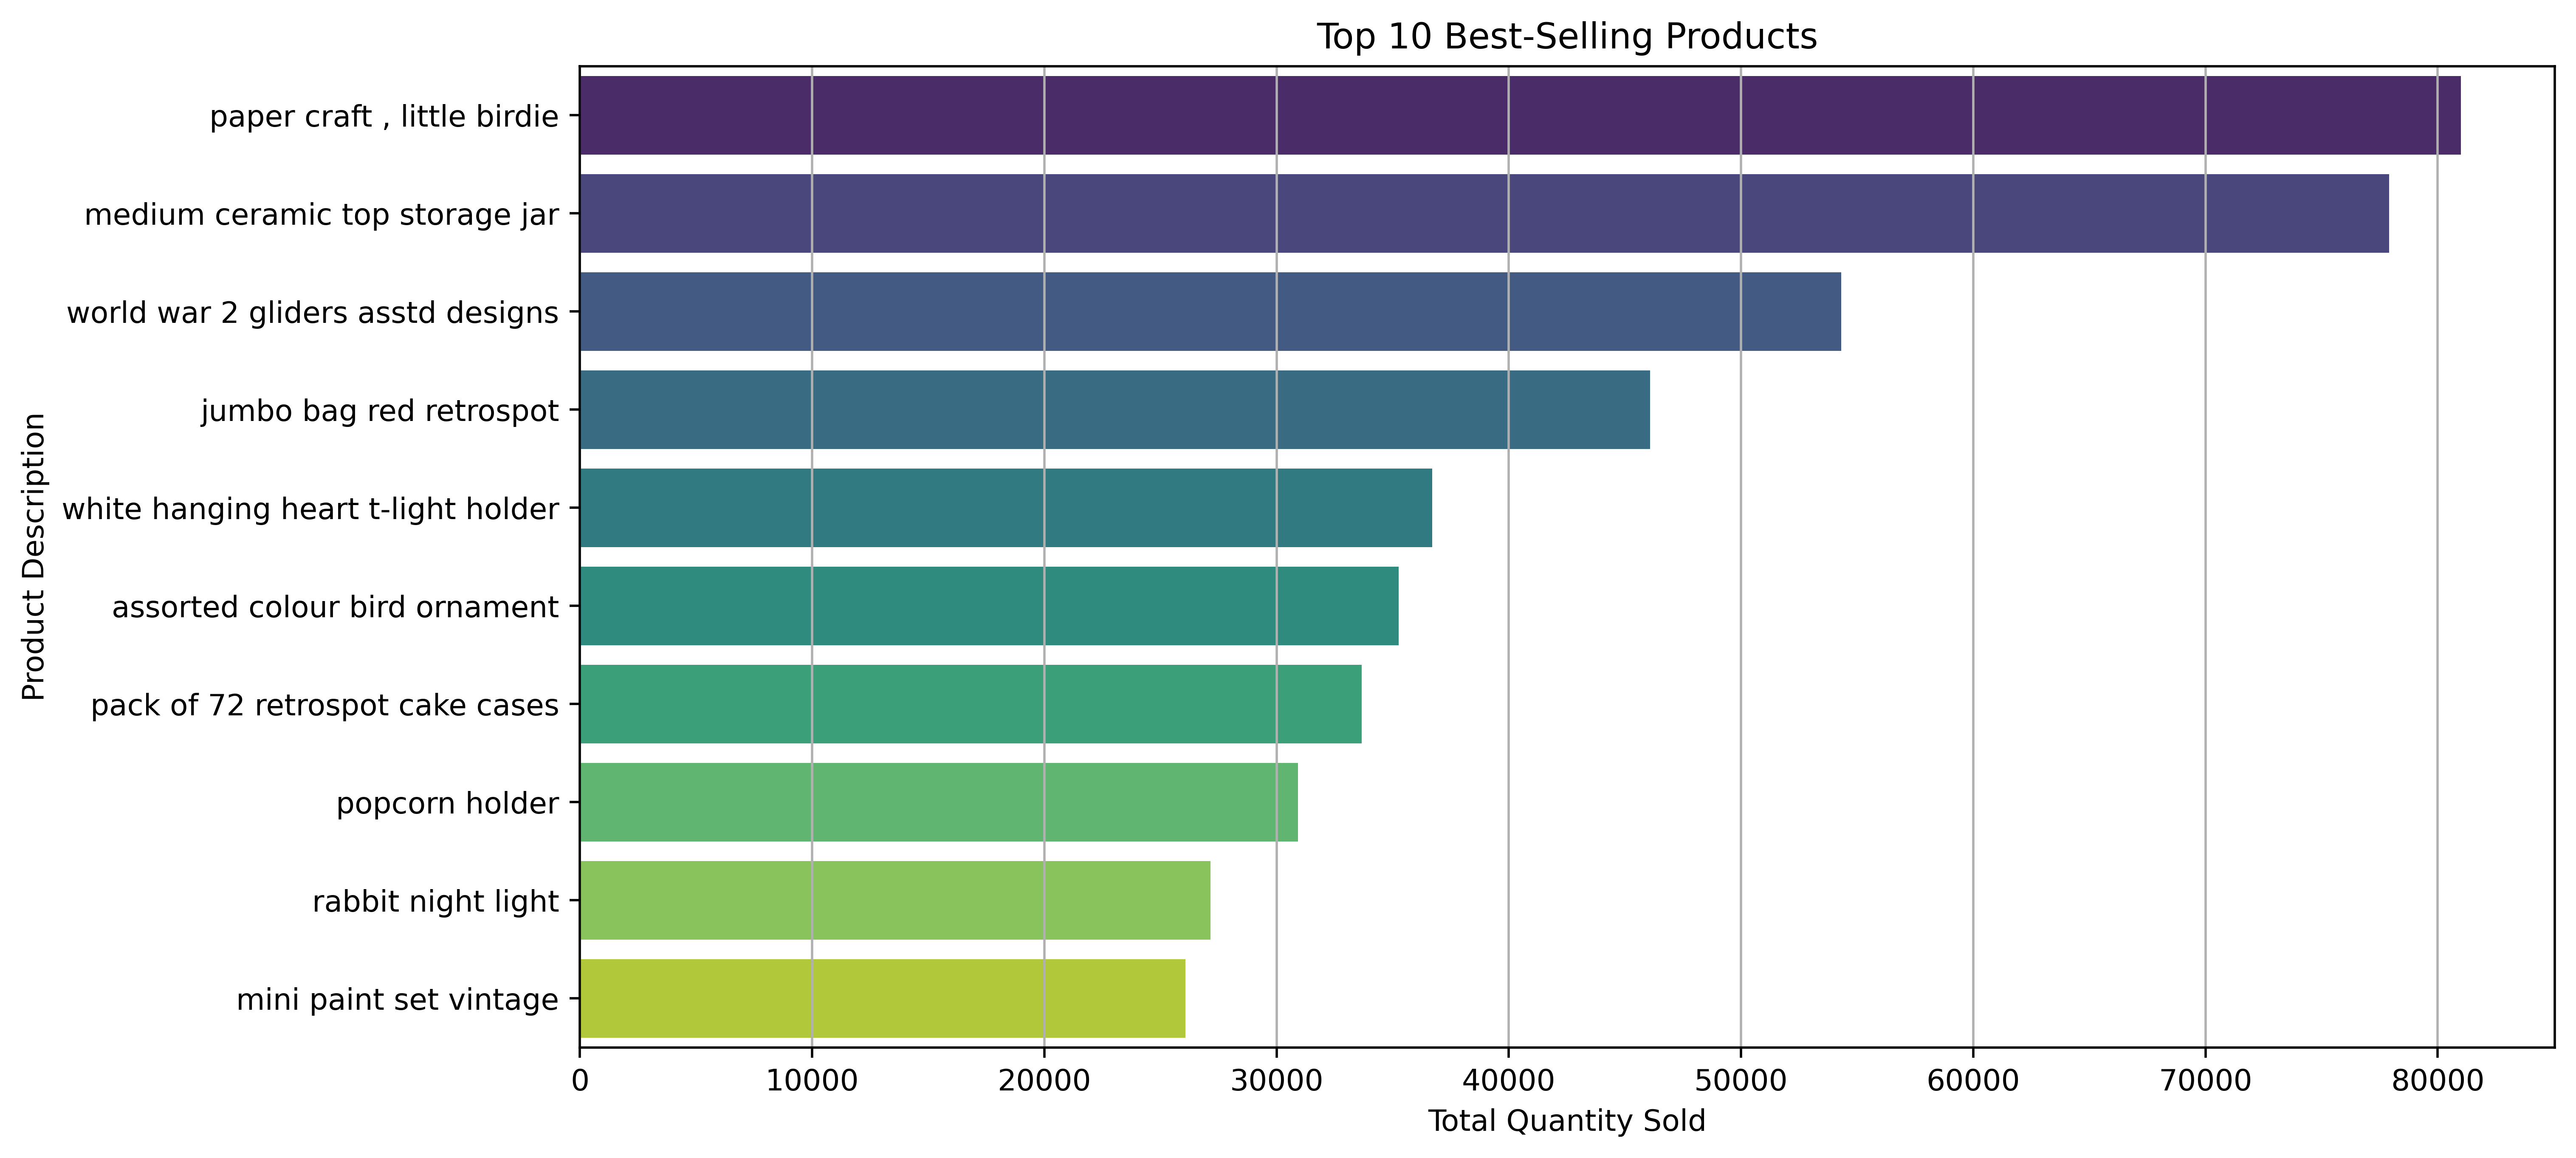

In [11]:
# Top 10 best-selling products by quantity sold
top_products = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)

# Plot top-selling products
plt.figure(figsize=(12, 6),dpi=500)
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Description")
plt.grid(axis="x")
plt.show()


### Total sales by Countries

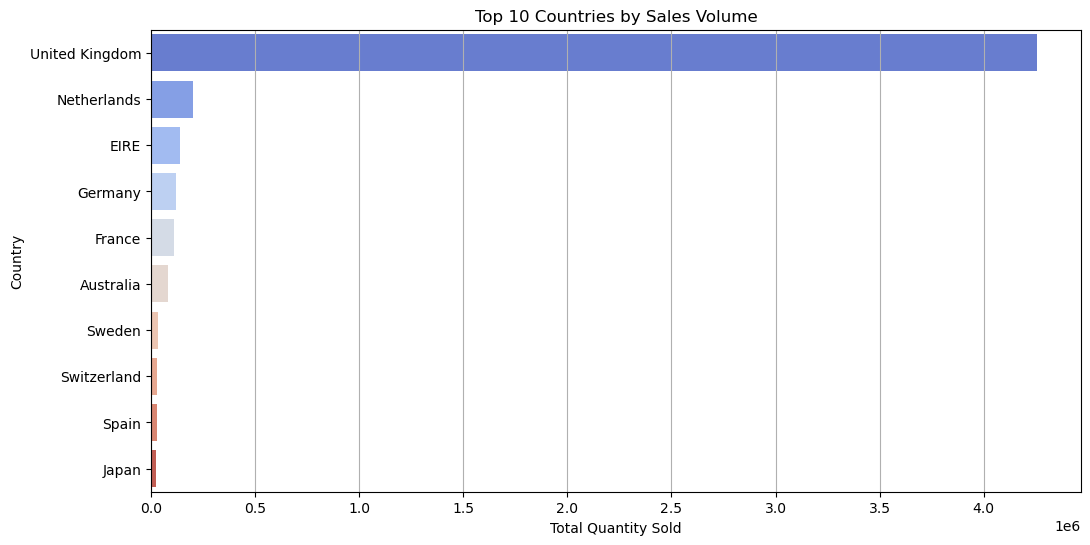

In [13]:
# Total quantity sold by country
country_sales = df.groupby("Country")["Quantity"].sum().sort_values(ascending=False).head(10)

# Plot sales distribution by country
plt.figure(figsize=(12, 6))
sns.barplot(x=country_sales.values, y=country_sales.index, palette="coolwarm")
plt.title("Top 10 Countries by Sales Volume")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Country")
plt.grid(axis="x")
plt.show()


In [14]:
#Customer Segmentation using Recency, Frequency, Monetary(RFM) Analysis

#CAlculate Monetary Value (Total spending per customer)
df["TotalPrice"]=df["Quantity"]
rfm_df = df.groupby("CustomerID").agg(
    Recency=("InvoiceDate", lambda x: (df["InvoiceDate"].max() - x.max()).days),
    Frequency=("InvoiceNo", "nunique"),
    Monetary=("TotalPrice","sum")
)

#Display the first few records
rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,326,1,74215
12347,40,7,2458
12348,76,4,2341
12349,19,1,631
12350,311,1,197


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Scale the RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm_df["Cluster"] = kmeans.fit_predict(rfm_scaled)

# Display cluster counts
rfm_df["Cluster"].value_counts()


  File "C:\Users\wahid\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\wahid\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\wahid\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\wahid\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


Cluster
1    2987
0    1105
2     229
3      18
Name: count, dtype: int64

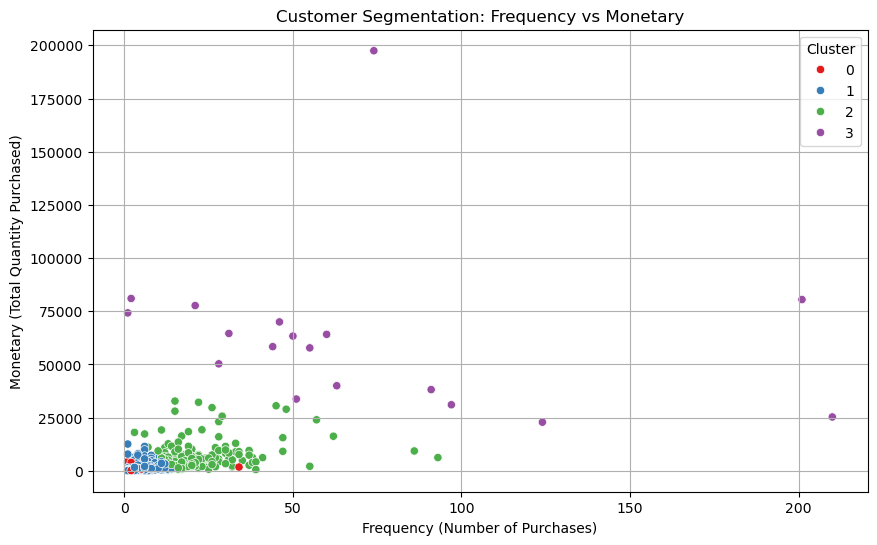

In [16]:
import seaborn as sns

# Plot clusters with Frequency vs Monetary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_df, x="Frequency", y="Monetary", hue="Cluster", palette="Set1")
plt.title("Customer Segmentation: Frequency vs Monetary")
plt.xlabel("Frequency (Number of Purchases)")
plt.ylabel("Monetary (Total Quantity Purchased)")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


In [20]:
print(cohort.head())  # Check if 'CohortMonth' exists


   CustomerID CohortMonth
0       12346     2011-01
1       12347     2010-07
2       12348     2010-12
3       12349     2011-11
4       12350     2011-02


In [24]:
df['CohortMonth'] = df['CohortMonth'].dt.to_timestamp()
df['InvoiceYearMonth'] = df['InvoiceYearMonth'].dt.to_timestamp()


KeyError: 'CohortMonth'

In [18]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceYearMonth'] = df['InvoiceDate'].dt.to_period('M')

cohort = df.groupby('CustomerID')['InvoiceYearMonth'].min().reset_index()
cohort.rename(columns={'InvoiceYearMonth': 'CohortMonth'}, inplace=True)

df = df.merge(cohort, on='CustomerID')

# Ensure 'CohortMonth' is in datetime format
df['CohortMonth'] = df['CohortMonth'].dt.to_timestamp()
df['InvoiceYearMonth'] = df['InvoiceYearMonth'].dt.to_timestamp()


# Compute cohort index (months since first purchase)
# df["CohortIndex"] = (df["InvoiceYearMonth"].dt.to_period('M') - df["CohortMonth"].dt.to_period('M')).apply(lambda x: x.n)


KeyError: 'CohortMonth'

In [ ]:
# Extract year-month for cohort analysis
df["InvoiceYearMonth"] = df["InvoiceDate"].dt.to_period("M")

# Identify first purchase month per customer
cohort = df.groupby("CustomerID")["InvoiceYearMonth"].min().reset_index()
cohort.columns = ["CustomerID", "CohortMonth"]

# Merge cohort month with main dataset
df = df.merge(cohort, on="CustomerID")

# Compute cohort index (months since first purchase)
df["CohortIndex"] = (df["InvoiceYearMonth"] - df["CohortMonth"]).apply(lambda x: x.n)

# Create cohort matrix for retention analysis
cohort_counts = df.groupby(["CohortMonth", "CohortIndex"])["CustomerID"].nunique().unstack()
cohort_retention = cohort_counts.divide(cohort_counts.iloc[:, 0], axis=0) * 100

# Display cohort retention matrix
cohort_retention.head()
